In [1]:
%matplotlib inline
from model.agents import FlatTransitionAgent, JointTransitionAgent, IndependentTransitionAgent
from model.gridworld import make_task
from model import list_entropy, mutual_information, plot_results, simulate_one
from model import simulate_task_transitions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper', font_scale=1.5)

In [2]:
# define all of the task parameters
grid_world_size = (6, 6)

# define mapping between primitive action (a in [0, 1]) and cardinal movements
# (left, right, up down)
mapping_definitions = {
    0: {0: u'left', 1: u'up', 2: u'down', 3: u'right'},
    1: {4: u'up', 5: u'left', 6: u'right', 7: u'down'},
}

# define goal locations in (x, y) coordinate space
goal_locations = {
    0:(0, 0),
    1:(0, 5),
    2:(5, 0),
    3:(5, 5),
}


# assign goals and mappings to contexts
context_goals = [0, 3, 0, 3]
context_maps =  [0, 0, 1, 1]

# randomly start the agent somewhere in the middle of the map
start_locations = [(x, y) for x in range(1, 4) for y in range(1, 4)]

# the number of times each context is shown
context_balance = [4] * len(context_goals)

# the hazard rate determines a degree of auto correlation in the context orders. This is
# useful in human studies. The hazard rates is the defined by the probability of a 
# context change after i repeats is f(i)
hazard_rates = [0.5, 0.67, 0.67, 0.75, 1.0, 1.0]


task_kwargs = dict(context_balance=context_balance, 
                   context_goals=[goal_locations[g] for g in context_goals], 
                   context_maps=[mapping_definitions[m] for m in context_maps],
                   hazard_rates=hazard_rates, start_locations=start_locations,
                   grid_world_size=grid_world_size,
                   )

100%|██████████| 25/25 [08:22<00:00, 15.52s/it]


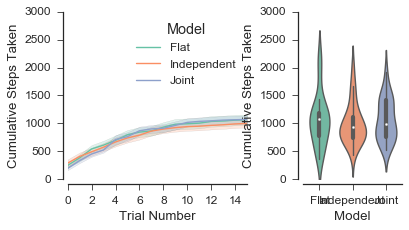

In [5]:
n_sim = 25
results = simulate_task_transitions(n_sim, task_kwargs)
plot_results(results)



In [7]:
df0 = results[results['In goal']].groupby(['Model', 'Simulation Number', 'Trial Number']).mean()
df0 = df0.groupby(level=[0, 1]).cumsum().reset_index()
df0 = df0.rename(index=str, columns={'n actions taken': "Cumulative Steps Taken"})
df0 = df0[df0['Trial Number'] == df0['Trial Number'].max()]
# sim1.groupby(['Model', 'Simulation Number']).mean()
print df0.groupby('Model').mean()['Cumulative Steps Taken']
print df0.groupby('Model')['Cumulative Steps Taken'].std()


Model
Flat           1065.56
Independent     998.76
Joint          1070.88
Name: Cumulative Steps Taken, dtype: float64
Model
Flat           468.339005
Independent    367.592537
Joint          370.625746
Name: Cumulative Steps Taken, dtype: float64


In [4]:
raise

TypeError: exceptions must be old-style classes or derived from BaseException, not NoneType

In [ ]:
from tqdm import tnrange

n_sim = 1

# agent_kwargs = {'alpha': 1.0}

res_i = [None] * n_sim
for ii in tnrange(n_sim):
    res_i[ii] = simulate_one(IndependentTransitionAgent, ii, task_kwargs, evaluate=True)
res_i = pd.concat(res_i)
res_i['Model'] = ['Independent'] * len(res_i)

In [ ]:
from tqdm import tnrange

n_sim = 25

# agent_kwargs = {'alpha': 1.0}

res_j = [None] * n_sim
for ii in tnrange(n_sim):
    res_j[ii] = simulate_one(JointTransitionAgent, ii, task_kwargs, evaluate=True)
res_j = pd.concat(res_j)
res_j['Model'] = ['Joint'] * len(res_j)

In [ ]:
from tqdm import tnrange

n_sim = 25

res = [None] * n_sim
for ii in tnrange(n_sim):
    res[ii] = simulate_one(FlatTransitionAgent, ii, task_kwargs, evaluate=True)
res = pd.concat(res)
res['Model'] = ['Flat'] * len(res)

In [ ]:
results = pd.concat([res, res_j, res_i])
# results['Model'] = ['Flat'] * len(results)



plot_results(results)
# df0 = results[results['In goal']].groupby(['Model', 'Simulation Number', 'Trial Number']).mean()
# df0 = df0.groupby(level=[0, 1]).cumsum().reset_index()
# df0 = df0.rename(index=str, columns={'n actions taken': "Cumulative Steps Taken"})

# tsplot_kwargs = dict(
#     time='Trial Number',
#     value='Cumulative Steps Taken',
#     data=df0,
#     unit='Simulation Number',
# #     condition='Model',
# #     estimator=np.mean,
# #     ax=ax0,
#     color="Set2",
# )

# sns.tsplot(**tsplot_kwargs)

In [ ]:
import numpy as np
x = np.random.uniform(0, 1, size=100)
cmf = np.cumsum(x / np.sum(x))

In [ ]:
plt.plot(cmf)

In [ ]:
X = np.random.uniform(0, 1)

print np.sum(cmf < X )
print (cmf<X)[np.sum(cmf < X )]
cmf < X